# Workbook for Landing Page narrative

In [92]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
from src.dashboard import *
from src.model import *
import seaborn as sns

In [3]:
prescriber_data_16 = pd.read_csv('data/heme-onc_d_16.csv', delimiter='\t')
prescriber_data_15 = pd.read_csv('data/heme-onc_d_15.csv', delimiter='\t')
prescriber_data_14 = pd.read_csv('data/heme-onc_d_14.csv', delimiter='\t')

## Identify prescribing trends for a target drug

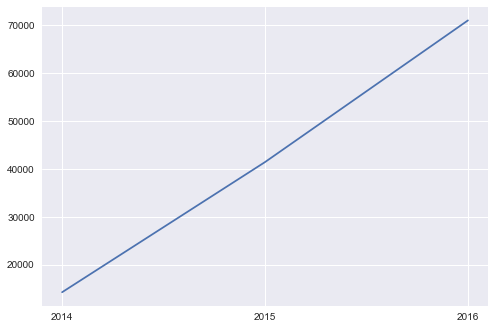

In [4]:
# Identify prescribing trends for a target drug
all_datasets = [prescriber_data_14, prescriber_data_15, prescriber_data_16]
target = 'IMBRUVICA'

target_num_prescribers = []
target_spending = []
target_num_claims = []

for dataset in all_datasets:
    target_num_prescribers.append((dataset['drug_name'] == target).sum())
    target_spending.append(dataset.loc[dataset['drug_name'] == target, 'total_drug_cost'].sum())
    target_num_claims.append(dataset.loc[dataset['drug_name'] == target, 'total_claim_count'].sum())

x = np.arange(2014,2017,1, dtype='int')
plt.plot(x,target_num_claims)
plt.xticks([2014, 2015, 2016]);

## Hierarchical clustering and heat map

In [5]:
from sklearn.preprocessing import StandardScaler

In [60]:
npi_claims = prescriber_data_16[['npi', 'drug_name','total_claim_count']]
npi_claims = pd.pivot_table(npi_claims, index='npi', columns='drug_name', values='total_claim_count', fill_value=0)

In [80]:
# Identify top prescribed drugs because matrix is too sparse otherwise
top_drugs = npi_claims.sum().sort_values()[::-1][:50].index
npi_claims_top = npi_claims[top_drugs]
top_drugs[:10]

Index(['ANASTROZOLE', 'LETROZOLE', 'TAMOXIFEN CITRATE',
       'HYDROCODONE-ACETAMINOPHEN', 'DEXAMETHASONE', 'PREDNISONE',
       'HYDROXYUREA', 'ONDANSETRON HCL', 'WARFARIN SODIUM',
       'PROCHLORPERAZINE MALEATE'],
      dtype='object', name='drug_name')

In [28]:
ss = StandardScaler()
npi_claims_scaled = ss.fit_transform(npi_claims)

In [61]:
npi_claims_scaled_normed = npi_claims.iloc[:500, :500]
#npi_claims_scaled_normed = (npi_claims_scaled_normed-npi_claims_scaled_normed.mean(axis=0))/npi_claims_scaled_normed.std(axis=0)

In [83]:
#plt.matshow(npi_claims_top,aspect='auto',vmin=1)

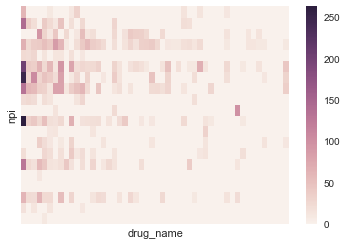

In [87]:
sns.heatmap(npi_claims_top[:20], xticklabels=False, yticklabels=False)

In [96]:
sns.clustermap(npi_claims_top, method='single')

AttributeError: Unknown property axisbg

<Figure size 720x720 with 0 Axes>